# Projeto Módulo 01 - Bootcamp Data Science Alura
Autor: Daniel Vaz Volponi 

Linkedin: https://www.linkedin.com/in/daniel-volponi-8513969a/

## Objetivo da Análise

Até o dia 30.05.2021 o Brasil registrou **16.471.600** casos e **461,142** mortes de COVID-19 (https://www.worldometers.info/coronavirus/), desde o ínicio da pandemia em Fevereiro de 2020. 

O estudo tem como objetivo analisar se a pandemia de COVID-19 impactou a quantidade, custo, e taxa de mortalidade de internações no Brasil.

### Bases Utilizadas: 
- Casos de COVID-19 - brasil.io (https://brasil.io/dataset/covid19/files/)
- Dados de quantidade, valor e obitos no DataSus (http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=11665&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?cnes/cnv/leiint)

Considerando o contexto acima, esta análise tem como objetivo entender o impacto da primeira onda de Covid-19 nas regiões e estados brasileiros. Para isso, analisaremos as seguintes informações:




In [1]:
# Importando Pacotes
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Alterar a forma como o pandas exibe os float.
pd.options.display.float_format = "{:.2f}".format 

In [2]:
# Importando bases de Dados do brasil.io
casos = pd.read_csv("dados/caso.csv.gz", sep=",")
casos = casos.query('place_type == "state"').drop(columns = "city")
casos.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-05-29,AP,state,111763,1688,432,True,845731.00,861773.00,16.00,12968.96,0.02
1,2021-05-28,AP,state,111524,1685,431,False,845731.00,861773.00,16.00,12941.23,0.02
2,2021-05-27,AP,state,111280,1683,430,False,845731.00,861773.00,16.00,12912.91,0.02
3,2021-05-26,AP,state,111079,1673,429,False,845731.00,861773.00,16.00,12889.59,0.02
4,2021-05-25,AP,state,110853,1666,428,False,845731.00,861773.00,16.00,12863.36,0.01


In [3]:
# Criando a coluna do Último dia do Mês
casos['date'] = pd.to_datetime(casos['date'], format='%Y-%m-%d')
casos['year_month'] = casos['date'].dt.to_period('M')

In [4]:
casos['year_month'].unique()

<PeriodArray>
['2021-05', '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11',
 '2020-10', '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04',
 '2020-03', '2020-02']
Length: 16, dtype: period[M]

In [5]:
ultima_dia_mes = casos[['date', 'year_month']].groupby('year_month').max()['date'].values

In [6]:
casos_por_mes = casos.set_index('date').loc[ultima_dia_mes]
casos_por_mes.head()

,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,year_month
date,,,,,,,,,,,,
2020-02-29,SP,state,2,0,5,False,45919049.00,46289333.00,35.00,0.00,0.00,2020-02
2020-03-31,AP,state,10,0,12,False,845731.00,861773.00,16.00,1.16,0.00,2020-03
2020-03-31,AC,state,42,0,15,False,881935.00,894470.00,12.00,4.70,0.00,2020-03
2020-03-31,AM,state,175,3,15,False,4144597.00,4207714.00,13.00,4.16,0.02,2020-03
2020-03-31,DF,state,333,3,24,False,3015268.00,3055149.00,53.00,10.90,0.01,2020-03


In [8]:
casos_ultimo_mes = casos_por_mes[casos_por_mes['year_month'] == '2021-03']
casos_ultimo_mes = casos_ultimo_mes.sort_values(by = 'confirmed', ascending = False)
casos_ultimo_mes.head()

,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,year_month
date,,,,,,,,,,,,
2021-03-31,SP,state,2469849,74652,394,False,45919049.00,46289333.00,35.00,5335.68,0.03,2021-03
2021-03-31,MG,state,1123913,24332,387,False,21168791.00,21292666.00,31.00,5278.40,0.02,2021-03
2021-03-31,PR,state,846105,16717,383,False,11433957.00,11516840.00,41.00,7346.68,0.02,2021-03
2021-03-31,RS,state,845380,19736,383,False,11377239.00,11422973.00,43.00,7400.70,0.02,2021-03
2021-03-31,SC,state,806929,10885,385,False,7164788.00,7252502.00,42.00,11126.22,0.01,2021-03


In [9]:
casos_ultimo_mes['deaths_per_cases'] = casos_ultimo_mes['deaths'] / casos_ultimo_mes['confirmed'] * 100
casos_ultimo_mes.head()

,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,year_month,deaths_per_cases
date,,,,,,,,,,,,,
2021-03-31,SP,state,2469849,74652,394,False,45919049.00,46289333.00,35.00,5335.68,0.03,2021-03,3.02
2021-03-31,MG,state,1123913,24332,387,False,21168791.00,21292666.00,31.00,5278.40,0.02,2021-03,2.16
2021-03-31,PR,state,846105,16717,383,False,11433957.00,11516840.00,41.00,7346.68,0.02,2021-03,1.98
2021-03-31,RS,state,845380,19736,383,False,11377239.00,11422973.00,43.00,7400.70,0.02,2021-03,2.33
2021-03-31,SC,state,806929,10885,385,False,7164788.00,7252502.00,42.00,11126.22,0.01,2021-03,1.35


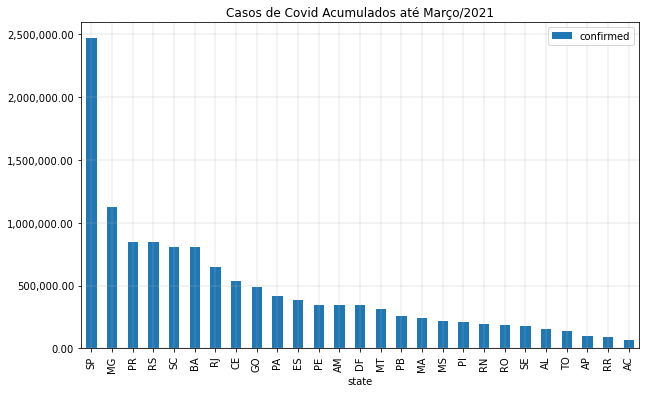

In [10]:
ax = casos_ultimo_mes.plot(x = 'state', y = 'confirmed', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Casos de Covid Acumulados até Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

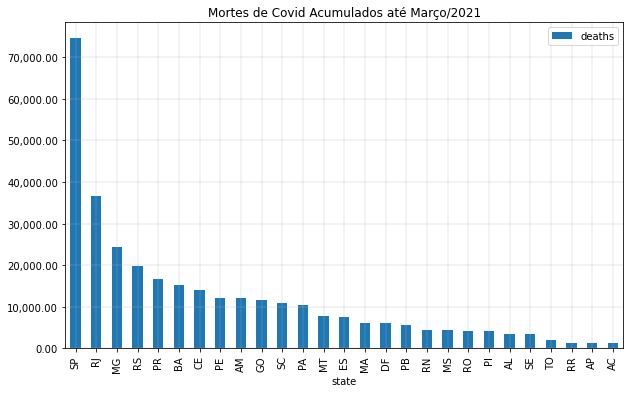

In [11]:
ax = casos_ultimo_mes.sort_values(by = "deaths", ascending = False).plot(x = 'state', y = 'deaths', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Mortes de Covid Acumulados até Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

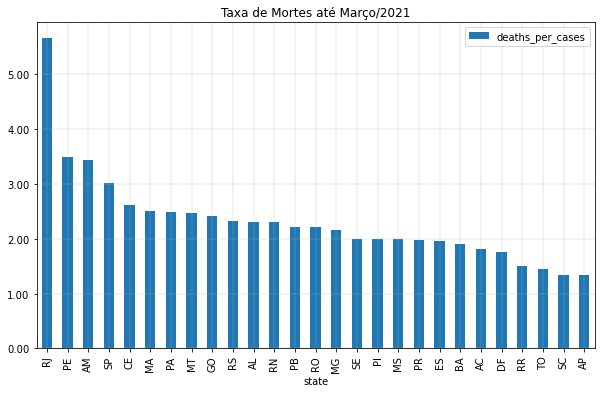

In [12]:
ax = casos_ultimo_mes.sort_values(by = "deaths_per_cases", ascending = False).plot(x = 'state', y = 'deaths_per_cases', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Taxa de Mortes até Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

Analisando os dados da base de COVID-19 até Março de 2021, percebe-se:

* O estado de São Paulo apresenta maior número de casos e de mortes, porém quando analisado a taxa de mortes por casos aparece no quarto lugar. Uma hipótese para este comportamento pode ser que São Paulo esteja fazendo mais testes que o dos outros estados. 
* O Rio de Janeiro, mesmo sendo o sétimo estado com o maior número de casos, é o maior com a taxa de mortalidade e número de mortes.

## Importando dados do DataSus
Agora vamos analisar se o mesmo comportamento acontece nas bases de quantidade, valor e obitos internações do DataSus.

In [23]:
# Importando base com a quantidade de internações
qtde_internacoes = pd.read_csv('./dados/A170446189_28_143_208_qtde_internacoes_por_uf.csv',
                    encoding="ISO-8859-1",
                    skiprows= 3, #Ignorar 3 primeiras linhas
                    sep = ";", 
                    skipfooter=12, # Ignorar 12 últimas linhas
                    thousands=".", # Separador de milhares
                    decimal=",") # Separador decimal
qtde_internacoes = qtde_internacoes[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)
qtde_internacoes.rename(columns = {'Total': 'Quantidade'}, inplace = True)
qtde_internacoes.head()

<ipython-input-23-dd5f743252a4>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  qtde_internacoes = pd.read_csv('./dados/A170446189_28_143_208_qtde_internacoes_por_uf.csv',


,Unidade da Federação,Quantidade
19,35 São Paulo,2551761
16,31 Minas Gerais,1274641
20,41 Paraná,846365
15,29 Bahia,803151
22,43 Rio Grande do Sul,773175


In [24]:
# Importando base com a quantidade de internações
valor_total = pd.read_csv('./dados/A170446189_28_143_208_valor_total_por_uf.csv',
                    encoding="ISO-8859-1",
                    skiprows= 3, #Ignorar 3 primeiras linhas
                    sep = ";", 
                    skipfooter=12, # Ignorar 12 últimas linhas
                    thousands=".", # Separador de milhares
                    decimal=",") # Separador decimal
valor_total = valor_total[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)
valor_total.rename(columns = {'Total': 'Valor'}, inplace = True)
valor_total.head()

<ipython-input-24-233053cffb7a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  valor_total = pd.read_csv('./dados/A170446189_28_143_208_valor_total_por_uf.csv',


,Unidade da Federação,Valor
19,35 São Paulo,4596722335.50
16,31 Minas Gerais,2290763179.99
20,41 Paraná,1676925595.16
22,43 Rio Grande do Sul,1453396637.77
18,33 Rio de Janeiro,1236150098.47


In [25]:
# Importando base com a quantidade de obitos
obitos = pd.read_csv('./dados/A170446189_28_143_208_obitos_por_uf_.csv',
                    encoding="ISO-8859-1",
                    skiprows= 3, #Ignorar 3 primeiras linhas
                    sep = ";", 
                    skipfooter=12, # Ignorar 12 últimas linhas
                    thousands=".", # Separador de milhares
                    decimal=",") # Separador decimal
obitos = obitos[['Unidade da Federação', 'Total']].sort_values(by = 'Total', ascending = False)
obitos.rename(columns = {'Total': 'Obitos'}, inplace = True)
obitos.head()

<ipython-input-25-f4b328ee1de1>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  obitos = pd.read_csv('./dados/A170446189_28_143_208_obitos_por_uf_.csv',


,Unidade da Federação,Obitos
19,35 São Paulo,177408
16,31 Minas Gerais,76305
18,33 Rio de Janeiro,70724
22,43 Rio Grande do Sul,52423
20,41 Paraná,47310


In [26]:
# Agrupando dados dos 3 dataframes do DataSus
agrupamento = qtde_internacoes.merge(valor_total, how = 'inner', on = 'Unidade da Federação')
agrupamento= agrupamento.merge(obitos, how = 'inner', on = 'Unidade da Federação')
agrupamento.head()

,Unidade da Federação,Quantidade,Valor,Obitos
0,35 São Paulo,2551761,4596722335.50,177408
1,31 Minas Gerais,1274641,2290763179.99,76305
2,41 Paraná,846365,1676925595.16,47310
3,29 Bahia,803151,1101971512.05,40997
4,43 Rio Grande do Sul,773175,1453396637.77,52423


In [27]:
agrupamento['Valor_Medio'] = agrupamento['Valor'] / agrupamento['Quantidade']
agrupamento['Taxa_Obitos'] = agrupamento['Obitos'] / agrupamento['Quantidade'] * 100
agrupamento.head()

,Unidade da Federação,Quantidade,Valor,Obitos,Valor_Medio,Taxa_Obitos
0,35 São Paulo,2551761,4596722335.50,177408,1801.39,6.95
1,31 Minas Gerais,1274641,2290763179.99,76305,1797.18,5.99
2,41 Paraná,846365,1676925595.16,47310,1981.33,5.59
3,29 Bahia,803151,1101971512.05,40997,1372.06,5.10
4,43 Rio Grande do Sul,773175,1453396637.77,52423,1879.78,6.78


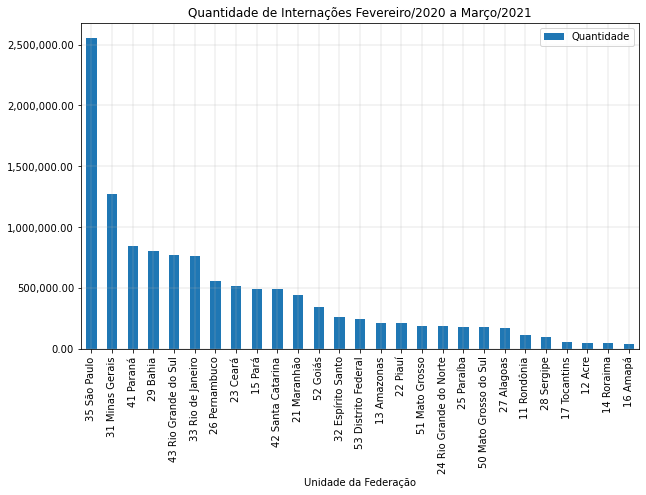

In [18]:
ax = agrupamento.sort_values(by = "Quantidade", ascending = False).plot(x = 'Unidade da Federação', y = 'Quantidade', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Quantidade de Internações Fevereiro/2020 a Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

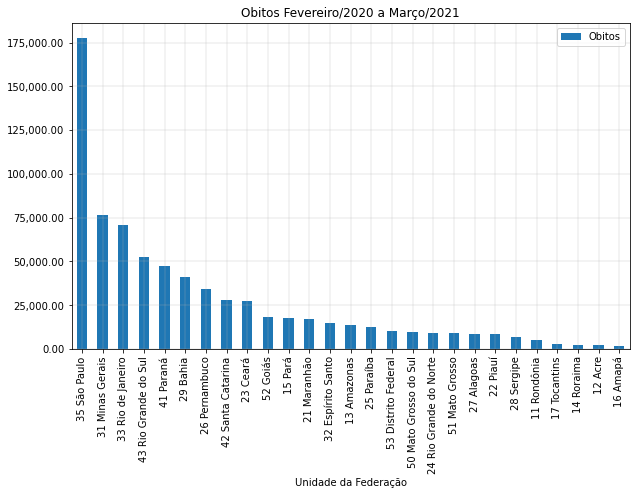

In [19]:
ax = agrupamento.sort_values(by = "Obitos", ascending = False).plot(x = 'Unidade da Federação', y = 'Obitos', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Obitos Fevereiro/2020 a Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

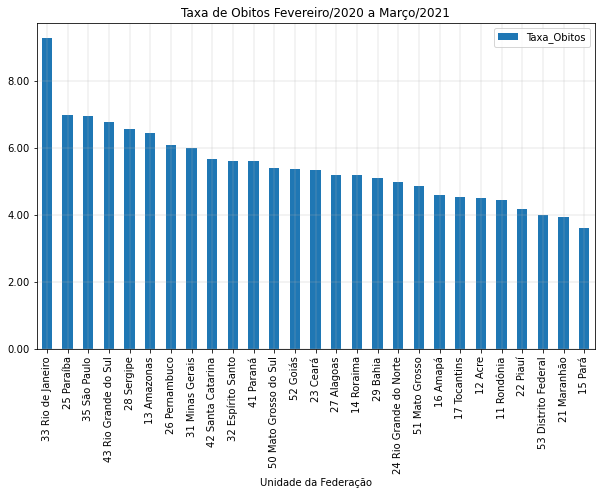

In [20]:
ax = agrupamento.sort_values(by = "Taxa_Obitos", ascending = False).plot(x = 'Unidade da Federação', y = 'Taxa_Obitos', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Taxa de Obitos Fevereiro/2020 a Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

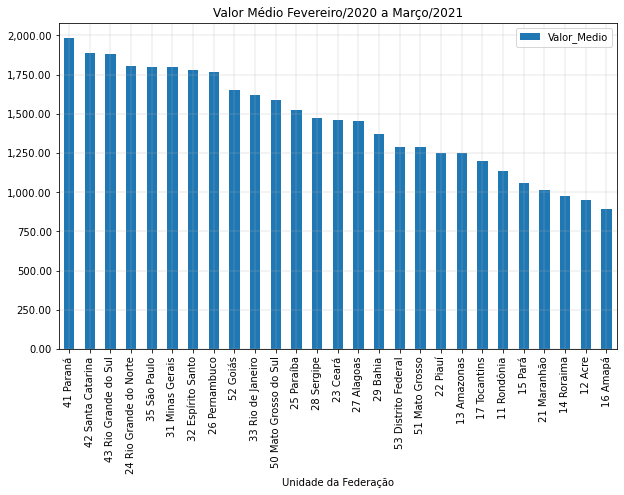

In [22]:
ax = agrupamento.sort_values(by = "Valor_Medio", ascending = False).plot(x = 'Unidade da Federação', y = 'Valor_Medio', kind = 'bar', figsize = (10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor Médio Fevereiro/2020 a Março/2021")
ax.grid(linestyle='-', linewidth=0.3)
plt.show()

Análisando os dados do Datasus pode-se perceber:

* Assim como nos dados de COVID-19, São Paulo aparece com o maior número de internações e de mortes. E como terceiro colocado na taxa de óbitos.
* O Rio de Janeiro apresenta o maior numero de taxa de obitos por internação.
* O valor médio por internação do Paraná é o maior de todos os outros estados.